**Logistic function**

**Types of Error : General, Optimistic and Pesimistic**

**Support Vector Machine**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset and use only two features for easy visualization
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Use first 100 samples and first two features for binary classification
y = iris.target[:100]  # Only first two classes (0, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM classifier from sklearn
svm_classifier = SVC(kernel='linear')

# Train the model and plot accuracy over iterations (we simulate iterations with different data splits)
accuracies = []

In [ ]:
# For plotting accuracy curve, we split the data multiple times to simulate training iterations
for i in range(1, 21):  # 20 iterations
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    svm_classifier.fit(X_train_split, y_train_split)
    y_pred = svm_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

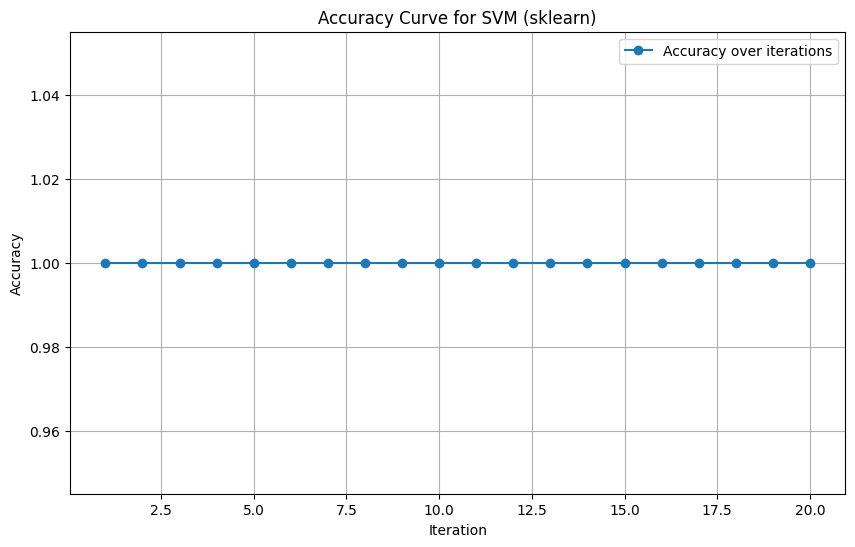

In [ ]:
# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', label="Accuracy over iterations")
plt.title("Accuracy Curve for SVM (sklearn)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolor='k', label='Data points')
    plt.title("Decision Boundary for SVM (sklearn)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

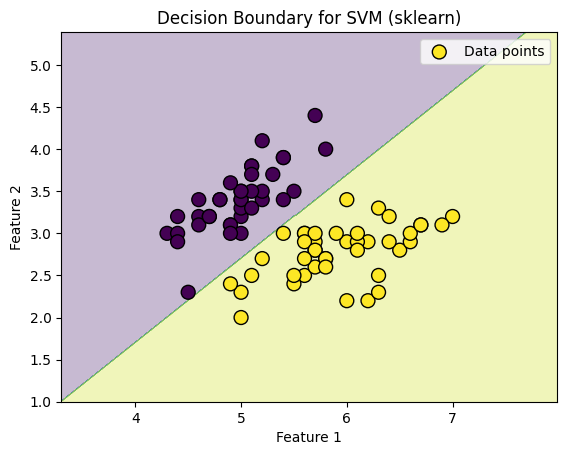

In [ ]:
plot_decision_boundary(X_train, y_train, svm_classifier)

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [ ]:
# Custom SVM Training
svm = SVM(n_iters=100)
accuracies_custom = []

In [ ]:
# Simulating multiple iterations
for i in range(1, 21):
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    svm.fit(X_train_split, y_train_split)
    y_pred = svm.predict(X_test)
    acc = np.mean(y_pred == y_test)
    accuracies_custom.append(acc)

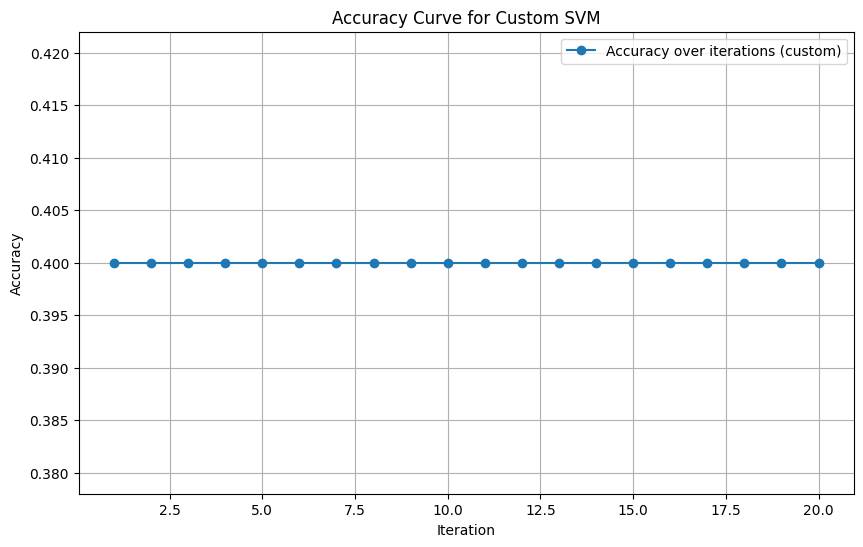

In [ ]:
# Plot accuracy curve for custom SVM
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies_custom, marker='o', label="Accuracy over iterations (custom)")
plt.title("Accuracy Curve for Custom SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

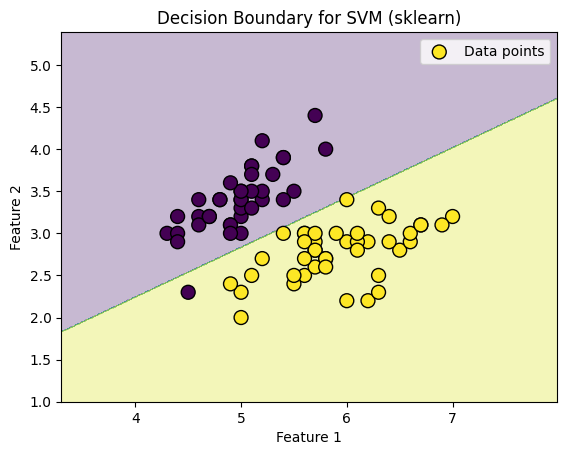

In [ ]:
# Plot decision boundary for custom SVM
plot_decision_boundary(X_train, y_train, svm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset and use all three classes for multiclass classification
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use first two features for easy visualization
y = iris.target  # Three classes (0, 1, 2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM classifier with One-vs-Rest (sklearn does this automatically)
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

# Track accuracy over multiple iterations
accuracies = []

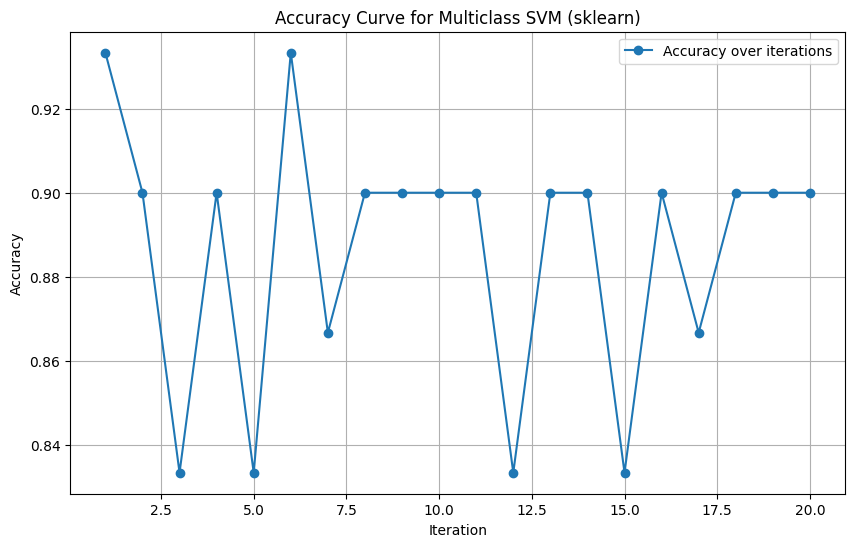

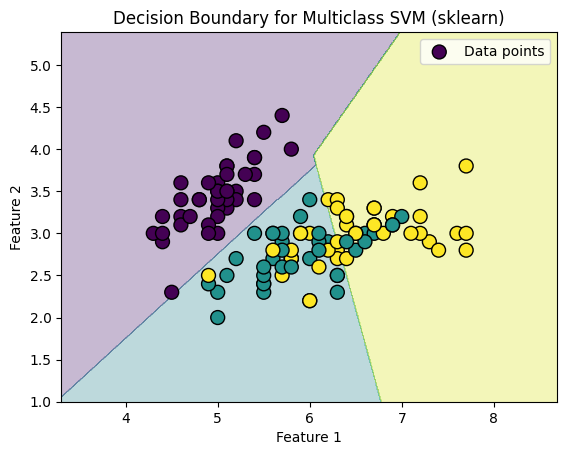

In [ ]:
# For accuracy curve, we simulate multiple data splits (iterations)
for i in range(1, 21):  # 20 iterations
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    svm_classifier.fit(X_train_split, y_train_split)
    y_pred = svm_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy curve for multiclass classification
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', label="Accuracy over iterations")
plt.title("Accuracy Curve for Multiclass SVM (sklearn)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolor='k', label='Data points')
    plt.title("Decision Boundary for Multiclass SVM (sklearn)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot decision boundary for sklearn SVM
plot_decision_boundary(X_train, y_train, svm_classifier)

# Logistic Regression on Iris dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Logistic regression class
class LogisticRegression:
  def __init__(self, learning_rate=0.01, n_iters=26):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = sigmoid(linear_model)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

# Train the logistic regression model for binary classification (only classes 0 and 1)
X_binary = X[y <= 1]
y_binary = y[y <= 1]
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.3
)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_binary, y_train_binary)

# Predict on the test set
y_pred_binary = model.predict(X_test_binary)

# Evaluate the model
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy for Binary Logistic Regression:", accuracy_binary)


Accuracy for Binary Logistic Regression: 0.6666666666666666


In [ ]:
y_test_binary

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
y_pred_binary

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

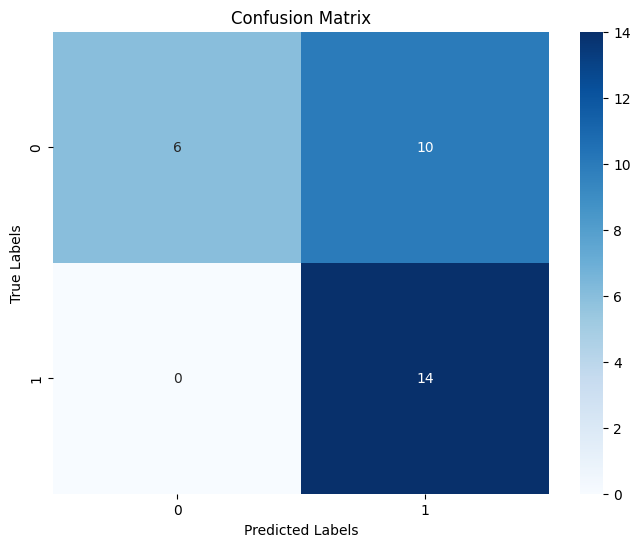

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()